In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [ ]:
# Load datasets
test_essays = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/test_essays.csv')
train_essays = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/train_essays.csv')
train_prompts = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/train_prompts.csv')
sub_sample = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/sample_submission.csv')
external_file = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/ai_generated_train_essays.csv')

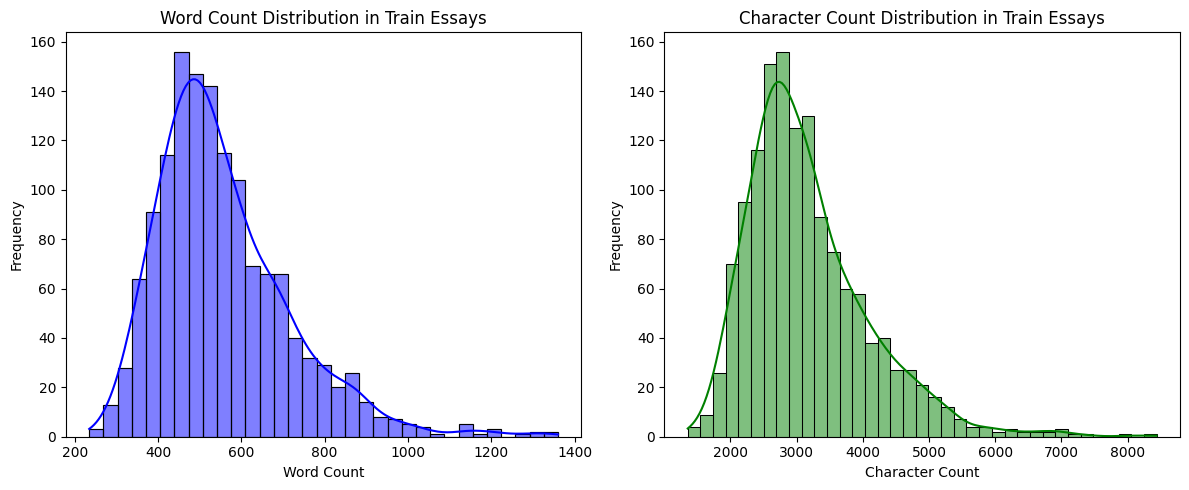

In [ ]:
# Analyzing the 'train_essays' dataset
test_essays['word_count'] = test_essays['text'].apply(lambda x: len(x.split()))
test_essays['char_count'] = test_essays['text'].apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(test_essays['word_count'], kde=True, color='blue')
plt.title('Word Count Distribution in Train Essays')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_essays['char_count'], kde=True, color='green')
plt.title('Character Count Distribution in Train Essays')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords
from collections import Counter

# Original Dataset EDA
original_gen_counts = train_essays['generated'].value_counts()

fig_orig = px.bar(original_gen_counts, title='Original Dataset - Distribution of AI and Human Essays')
fig_orig.show()

train_essays['essay_len'] = train_essays['text'].str.split().map(len)
fig_len_orig = px.histogram(train_essays, x='essay_len', title='Original Dataset - Essay Length Distribution')
fig_len_orig.show()

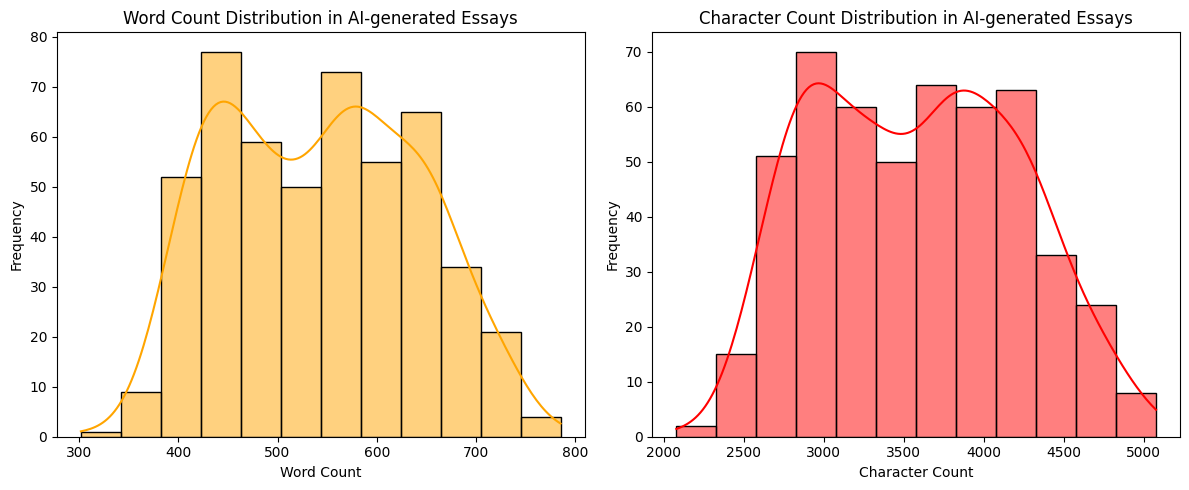

In [ ]:

# Analyzing the 'external_file' dataset (AI-generated essays)
external_file['word_count'] = external_file['text'].apply(lambda x: len(x.split()))
external_file['char_count'] = external_file['text'].apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(external_file['word_count'], kde=True, color='orange')
plt.title('Word Count Distribution in AI-generated Essays')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(external_file['char_count'], kde=True, color='red')
plt.title('Character Count Distribution in AI-generated Essays')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Most common words (original dataset)
word_occ_orig = Counter([word.lower() for words in train_essays['text'] for word in words.split()])
df_temp_orig = pd.DataFrame(word_occ_orig.most_common(10))
df_temp_orig.columns = ['Common Words', 'count']

fig_common_words_orig = px.bar(df_temp_orig, x='count', y='Common Words', orientation='h', title='Original Dataset - Most Common Words')
fig_common_words_orig.show()

merged dataset

In [ ]:
import pandas as pd

# Load datasets
test_essays = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/test_essays.csv')
train_essays = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/train_essays.csv')
train_prompts = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/train_prompts.csv')
sub_sample = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/sample_submission.csv')
external_file = pd.read_csv('/content/drive/MyDrive/DATA_255/projecty/ai_generated_train_essays.csv')

# Combine datasets
combine_essays = pd.concat([external_file, train_essays]).sample(frac=1).reset_index(drop=True)


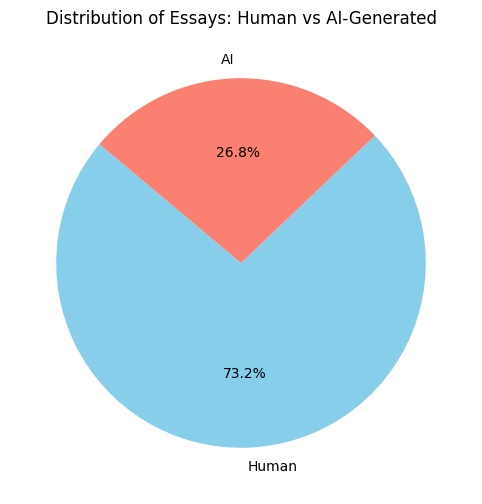

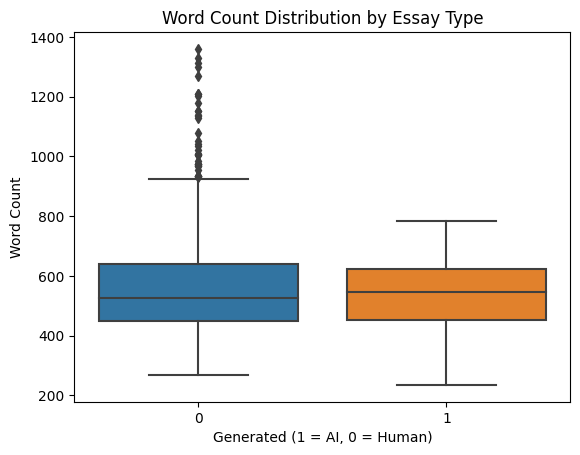

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of essays (AI vs Human)
human_vs_ai_counts = combine_essays['generated'].value_counts()
labels = ['Human', 'AI']
plt.figure(figsize=(8, 6))
plt.pie(human_vs_ai_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Distribution of Essays: Human vs AI-Generated')
plt.show()

# Word Count Distribution
combine_essays['word_count'] = combine_essays['text'].apply(lambda x: len(x.split()))
sns.boxplot(x='generated', y='word_count', data=combine_essays)
plt.title('Word Count Distribution by Essay Type')
plt.xlabel('Generated (1 = AI, 0 = Human)')
plt.ylabel('Word Count')
plt.show()


In [ ]:
# merged Dataset
combined_gen_counts = combine_essays['generated'].value_counts()

fig_comb = px.bar(combined_gen_counts, title='Combined Dataset - Distribution of AI and Human Essays')
fig_comb.show()

combine_essays['essay_len'] = combine_essays['text'].str.split().map(len)
fig_len_comb = px.histogram(combine_essays, x='essay_len', title='Combined Dataset - Essay Length Distribution')
fig_len_comb.show()

In [ ]:
# Most common words (combined dataset)
word_occ_comb = Counter([word.lower() for words in combine_essays['text'] for word in words.split()])
df_temp_comb = pd.DataFrame(word_occ_comb.most_common(10))
df_temp_comb.columns = ['Common Words', 'count']

fig_common_words_comb = px.bar(df_temp_comb, x='count', y='Common Words', orientation='h', title='Combined Dataset - Most Common Words')
fig_common_words_comb.show()

In [ ]:
def clean_text(paragraphs):
    cleaned = []
    for word in paragraphs:
        lower_case = word.lower()
        if lower_case not in punctuation and lower_case not in stopwords.words('english') and len(word) > 2 and word.isalpha():
            cleaned.append(lower_case)
        else:
            continue
    return cleaned


def lemmatization(paragraphs):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in paragraphs:
        lemma_word = lemmatizer.lemmatize(i)
        final_text.append(lemma_word)
    return " ".join(final_text)


def text_preprocess(texts):
    replaced = texts.apply(lambda t: t.replace("\\n"," ").replace("\t"," "))
    decoded = replaced.apply(unidecode)
    tokenized = decoded.apply(word_tokenize)
    cleaned = tokenized.apply(clean_text)
    final_product = cleaned.apply(lemmatization)
    return final_product

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Basic text cleaning
combine_essays['cleaned_text'] = combine_essays['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(combine_essays['cleaned_text'])
sequences = tokenizer.texts_to_sequences(combine_essays['cleaned_text'])
X = pad_sequences(sequences, maxlen=512)
y = combine_essays['generated'].values


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=512))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 512, 64)           49408     
                                                                 
 dropout (Dropout)           (None, 512, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 701857 (2.68 MB)
Trainable params: 701857 (2.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
22/22 [===

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


12/12 [==============================] - 3s 225ms/step - loss: 0.0683 - accuracy: 0.9814
Test Accuracy: 0.98


In [ ]:
# Making predictions on the test set
test_sequences = tokenizer.texts_to_sequences(test_essays['text'])
test_padded = pad_sequences(test_sequences, maxlen=512)
test_predictions = model.predict(test_padded).flatten()



1/1 [==============================] - 1s 1s/step


In [ ]:
# Preparing the submission file
test_essays['generated'] = test_predictions
submission = test_essays[['id', 'generated']]
submission.to_csv('/content/drive/MyDrive/DATA_255/projecty/submission_lstm.csv', index=False)